# k-means clustering

First we import the libraries that will be used, sys and seaborn can be removed , the other ones cannot be removed

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sys
sns.set(color_codes=True)
%matplotlib inline

An example how k-means for for a single data set

In [3]:
df=pd.read_csv('data_0.5_1.csv',header=None) # using pandas ,we read the data set corresponding to eq.ratio 0.5

In [4]:
X=df.values[:,[3,4,5]] # select features volumetric flows column 4 and 5, sensor measurements column 3

Rescaling inputs and features

In [5]:
from sklearn.preprocessing import StandardScaler # StandardScaler tool for using standar normalization :mean=0, std.deviation=1
sc_input=StandardScaler()                        #instantiate the scaling. Name sc_input can be changed, StandardScaler cannot be changed
X=sc_input.fit_transform(X)                      # fit scaling to inputs and output
print(X)                                         # check that the scaling is working 

[[ 0.77326196 -0.7458066  -0.18479289]
 [-0.05260067 -1.10176167 -0.65828679]
 [ 0.46360277 -1.48668287 -0.25243488]
 ...
 [-0.98157824 -0.38298328  0.96512085]
 [ 1.70223953  0.03344233  0.45555123]
 [-0.98157824 -0.2787649  -0.48692709]]


Fitting k-means clustering

Time for kmeans fitting: 0.694
Time for kmeans fitting: 0.129
Time for kmeans fitting: 0.167
Time for kmeans fitting: 0.118
Time for kmeans fitting: 0.166
Time for kmeans fitting: 0.343
Time for kmeans fitting: 0.375
Time for kmeans fitting: 0.253
Time for kmeans fitting: 0.409
Time for kmeans fitting: 0.327
Time for kmeans fitting: 0.349
Time for kmeans fitting: 0.370
Time for kmeans fitting: 0.373
Time for kmeans fitting: 0.380
Time for kmeans fitting: 0.408
Time for kmeans fitting: 0.400
Time for kmeans fitting: 0.434
Time for kmeans fitting: 0.516
Time for kmeans fitting: 0.720
Time for kmeans fitting: 0.744


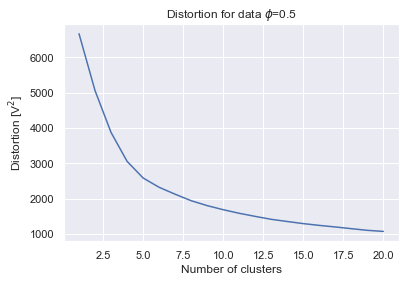

In [9]:
from sklearn.cluster import KMeans  #import k-means algorithm from sklearn 
distorsion = []                     # create list to save distortion function for different number of clusters

#run k-means from k=1 cluster to k=20 clusters, this two number can be change by the user. But k cannot be zero

# n_clusters: numbers of clusters, init='k-means++' should not be change, this is a way of dealing with initialization issue
# random_state=42, it could be any number, this number is given in order that k-means initializes at the same point
# when someone runs the code. This is useful for comparing different choices of number of clusters. 
# kmeans.inertia_= value of distorsion function for a k clusters. Do not change
# cluster_centers_= cluster centroids computed by the method. Do not change
# sc.inverse_transform= used to return outputs of k-means to the original scale of data set. Always in this order
# 'name'.inverse_trasform

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    stime=time.time()   #we measure time here in order to compute the time fitiing by k-means
    kmeans.fit(X)       # k-means is fitted to the data set
    print("Time for kmeans fitting: %.3f" % (time.time() - stime)) # print the time spent on fitting the method
    distorsion.append(kmeans.inertia_)                             #adding distortion function for k clusters
    clusters_centers=sc_input.inverse_transform(kmeans.cluster_centers_) # undo scaling to obtain the cluster centroids
    #print('cluster centers when k='+str(i)+':')
    #print(clusters_centers)

#plot distortion function respect with the number of clusters     
    
plt.plot(range(1, 21), distorsion)
plt.title('Distortion for data $\phi$=0.5')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion [V$^{2}$]')
plt.show()

In [10]:
# check numerical values of distorsion function for different number of clusters
# the user can delete these lines

print('distorsion k=10 :%.5f' % distorsion[9]) 
print('distorsion k=20 :%.5f'% distorsion[19])

distorsion k=10 :1689.75261
distorsion k=20 :1075.10125


Applying K-means to each data set and save centroid cluster in a single csv file

33
Time for kmeans fitting: 27.297


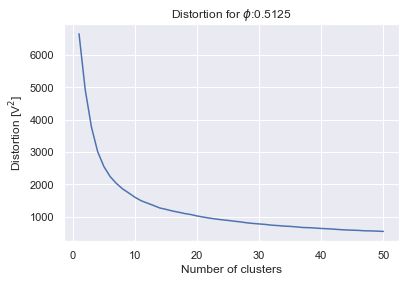

Time for kmeans fitting: 27.086


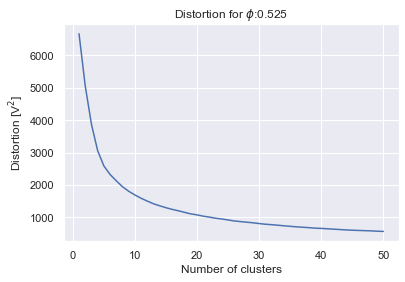

Time for kmeans fitting: 28.137


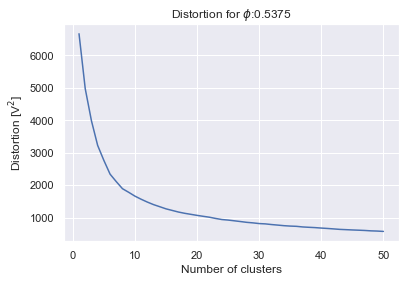

Time for kmeans fitting: 26.844


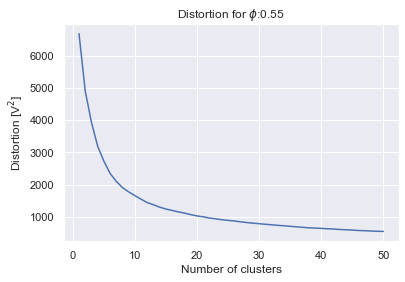

Time for kmeans fitting: 27.345


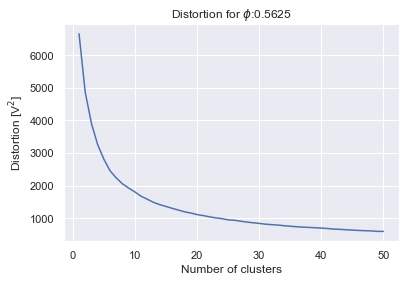

Time for kmeans fitting: 28.055


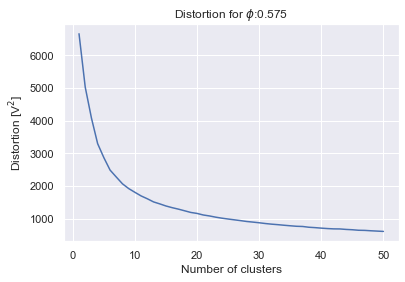

Time for kmeans fitting: 28.982


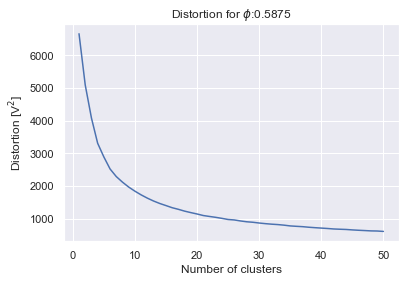

Time for kmeans fitting: 27.660


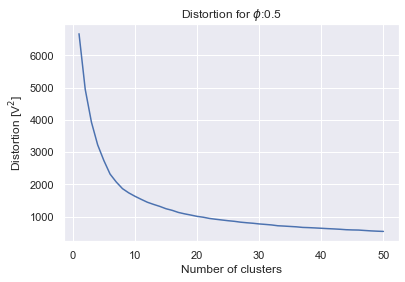

Time for kmeans fitting: 27.363


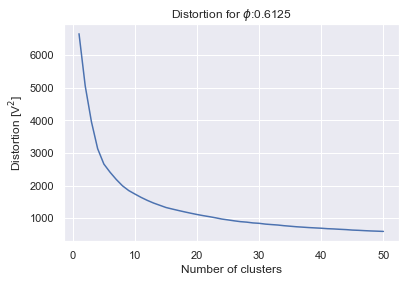

Time for kmeans fitting: 31.527


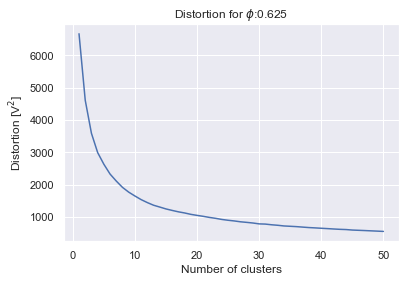

Time for kmeans fitting: 28.018


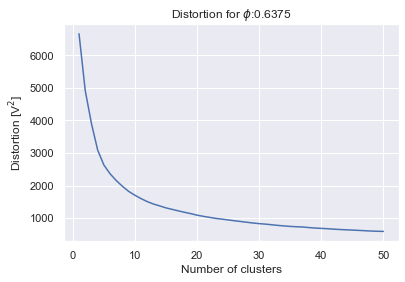

Time for kmeans fitting: 27.562


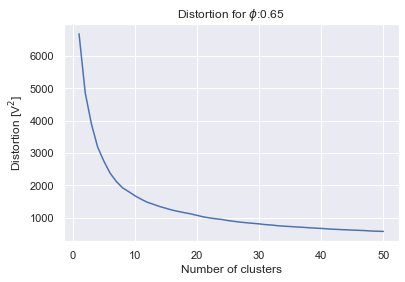

Time for kmeans fitting: 27.794


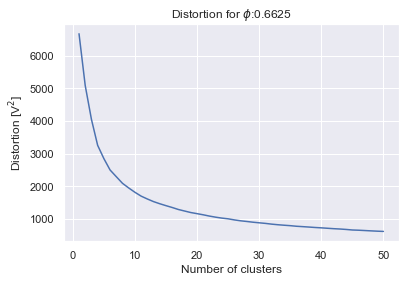

Time for kmeans fitting: 28.321


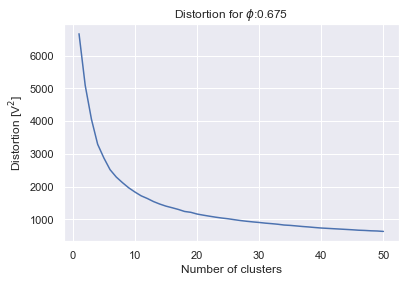

Time for kmeans fitting: 26.997


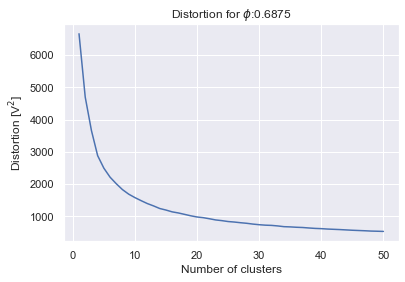

Time for kmeans fitting: 25.439


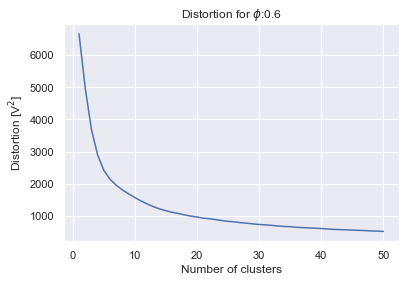

Time for kmeans fitting: 28.863


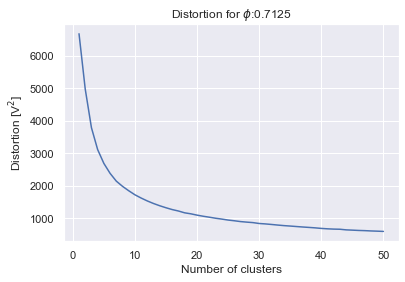

Time for kmeans fitting: 26.737


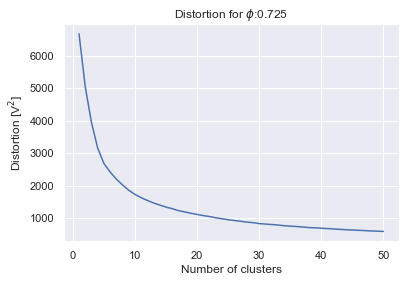

Time for kmeans fitting: 27.759


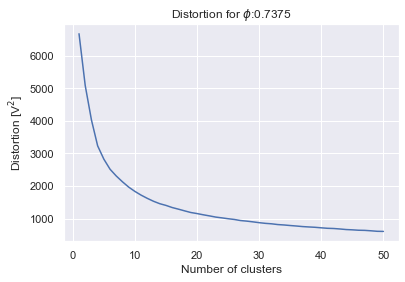

Time for kmeans fitting: 27.735


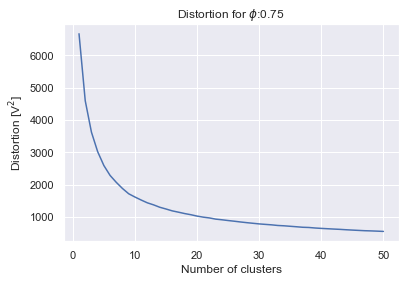

Time for kmeans fitting: 28.597


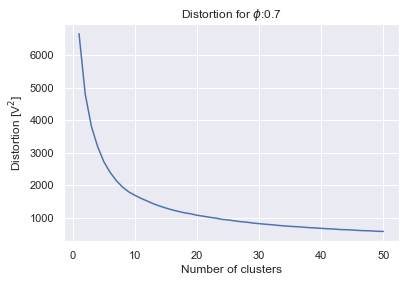

Time for kmeans fitting: 27.217


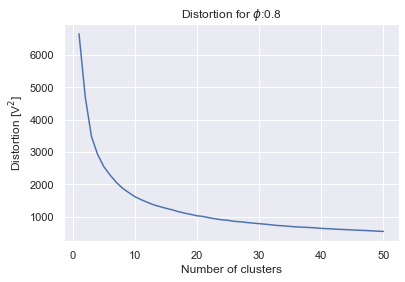

Time for kmeans fitting: 27.777


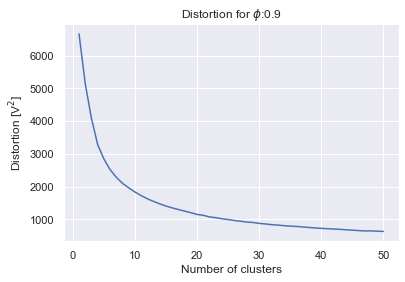

Time for kmeans fitting: 28.707


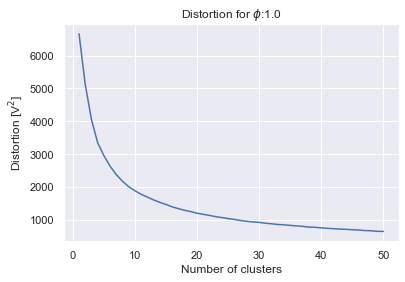

Time for kmeans fitting: 27.477


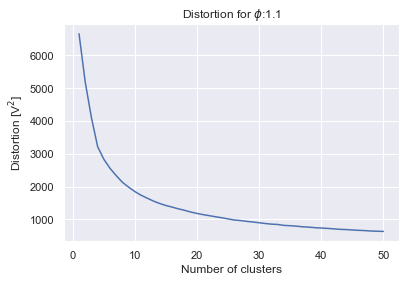

Time for kmeans fitting: 31.749


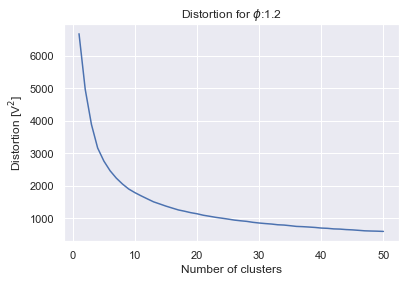

Time for kmeans fitting: 42.344


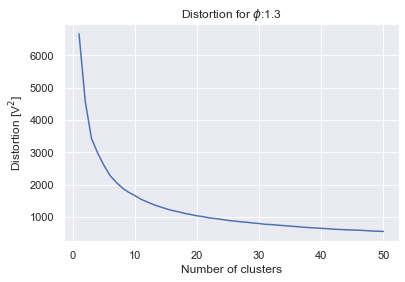

Time for kmeans fitting: 25.912


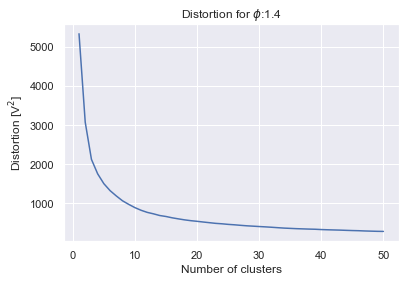

Time for kmeans fitting: 35.401


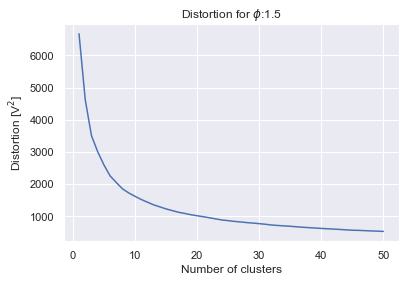

Time for kmeans fitting: 34.419


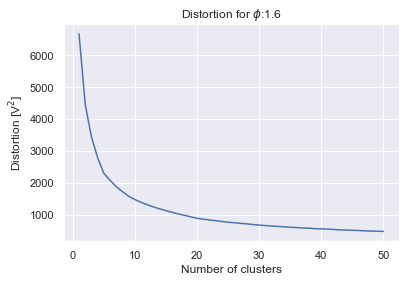

Time for kmeans fitting: 30.102


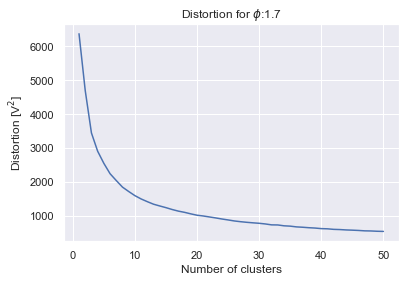

Time for kmeans fitting: 36.869


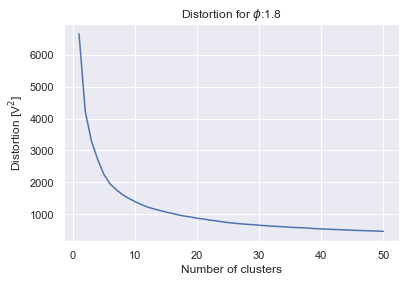

In [15]:
import os    #import libraty to read files in a directory 
#os.listdir('Data/Data_svenja')[1]
max=0
for files in os.listdir('Data/Data_svenja_clean_0.4'): #count files in directory where the data files are (after removing outlies)
    max=max+1
print(max)                                           # check the number of files in that directory
ratios=[]                                    # create list to save approximate ratios (representaive of each file)
distorsion_k10=[]                            # create list for distorsion function for different number of clusters 
distorsion_k20=[]   
distorsion_k30=[]
distorsion_k40=[]
distorsion_k50=[]


#read csv files in directory 'Data/Data_svenja_clean_0.4' for applying k-means
# basically it is repeat the example above but for the whole data set 


for j in range(1,max):
    name=os.listdir('Data/Data_svenja_clean_0.4')[j] #extract the name of the file
    distorsion = []                                  #create list for distorsion function
    dataset=pd.read_csv('Data/Data_svenja_clean_0.4/'+name,header=None) #read csv file with name "'Data/Data_svenja_clean_0.4/'+name"
    X=dataset.values[:,[3,4,5]]                         #array with inputs and outputs
    sc_input=StandardScaler()                           #instantite tool for scaling
    X=sc_input.fit_transform(X)                         #fit scaling tool to the data set
    stime=time.time()                                   #measure time for measuring time fitting by k-means
    for i in range(1, 51):                              #k-means for k=1 to k=50 number of clusters
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #read example above
        kmeans.fit(X)
        distorsion.append(kmeans.inertia_)
        #clusters_centers=kmeans.cluster_centers_
        #print('cluster centers when k='+str(i)+':')
        #print(clusters_centers)
    print("Time for kmeans fitting: %.3f" % (time.time() - stime))
    ratios.append(name.split('_')[1])                 #add approximate ratios to plot distorsion function later
    distorsion_k10.append(distorsion[9])              #adding distorsion function for k=10
    distorsion_k20.append(distorsion[19])             #similar for k=20,30,40,50
    distorsion_k30.append(distorsion[29])
    distorsion_k40.append(distorsion[39])
    distorsion_k50.append(distorsion[49])
    plt.plot(range(1, 51), distorsion)              #plot distorsion function for each data set
    plt.title('Distortion for $\phi$:'+name.split('_')[1]) #add in title equivalence ratio fo the data set
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion [V$^{2}$]')
    plt.show()

In [16]:
#print('data_0.5_1.csv'.split('_')[1]) 

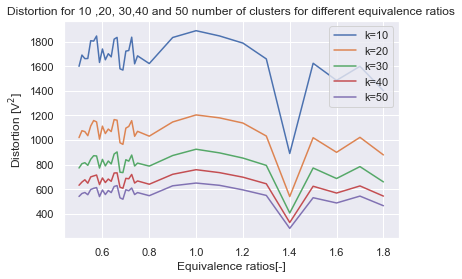

In [17]:
#ratios must be ordered in the right way
#routine for ordering ratios from the small value to the biggest value

ratios_1=np.zeros(32)
for i in range(0,len(ratios_1)):
    ratios_1[i]=float(ratios[i])
temp = 0    
for i in range(0, len(ratios_1)):  
    for j in range(i+1, len(ratios_1)):  
        if(ratios_1[i] > ratios_1[j]):  
            temp = ratios_1[i] 
            ratios_1[i] = ratios_1[j]  
            ratios_1[j] = temp

# plot distortion function for different number of clusters k=10,20,30,40 and 50 with respect
# to each data set( represented by its approximate equivalence ratio)            
            
plt.plot(ratios_1, distorsion_k10,'-',label='k=10')
plt.plot(ratios_1,distorsion_k20,'-',label='k=20')
plt.plot(ratios_1,distorsion_k30,'-',label='k=30')
plt.plot(ratios_1,distorsion_k40,'-',label='k=40')
plt.plot(ratios_1,distorsion_k50,'-',label='k=50')
plt.title('Distortion for 10 ,20, 30,40 and 50 number of clusters for different equivalence ratios')
plt.xlabel('Equivalence ratios[-]')
plt.ylabel('Distortion [V$^{2}$]')
plt.legend(loc='upper right')
plt.show()

Save cluster centroids for k=30 in a single csv file, it will be used for fitting Gaussian Process

In [10]:
import csv             #import this library to manipulate csv files
clusters=[]            #create list to save cluster centroids

# read files in directory where the csv files after reomving outliers were stored 
# max is the number of files in the  directory 
for j in range(1,max): 
    name=os.listdir('Data/Data_svenja_clean_0.4')[j] #read name file j in directory 'Data/Data_svenja_clean_0.4'
    dataset=pd.read_csv('Data/Data_svenja_clean_0.4/'+name,header=None) #read csv file with the previous name 
    X=dataset.values[:,[3,4,5]]                                        #array with inputs and outputs
    sc_input=StandardScaler()                                          #instantiate scaling tool
    X=sc_input.fit_transform(X)                                        #Fit scaling to data set 
    kmeans = KMeans(n_clusters = 30, init = 'k-means++', random_state = 42) #instantiate k-means(previous example)
    kmeans.fit(X)                                                           #fit kmeans to the data set
    print(name)                                                          #check that every files is being read
    for i in range (0,30):
        clusters.append(sc_input.inverse_transform(kmeans.cluster_centers_[i])) #add cluster centroids to list "clusters"

data_0.5125_1_0.35_0.05.csv
data_0.525_1_0.35_0.05.csv
data_0.5375_1_0.35_0.05.csv
data_0.55_1_0.35_0.05.csv
data_0.5625_1_0.35_0.05.csv
data_0.575_1_0.35_0.05.csv
data_0.5875_1_0.35_0.05.csv
data_0.5_1_0.35_0.05.csv
data_0.6125_1_0.35_0.05.csv
data_0.625_1_0.35_0.05.csv
data_0.6375_1_0.35_0.05.csv
data_0.65_1_0.35_0.05.csv
data_0.6625_1_0.35_0.05.csv
data_0.675_1_0.35_0.05.csv
data_0.6875_1_0.35_0.05.csv
data_0.6_1_0.35_0.05.csv
data_0.7125_1_0.35_0.05.csv
data_0.725_1_0.35_0.05.csv
data_0.7375_1_0.35_0.05.csv
data_0.75_1_0.35_0.05.csv
data_0.7_1_0.35_0.05.csv
data_0.8_1_0.35_0.05.csv
data_0.9_1_0.35_0.05.csv
data_1.0_1_0.35_0.05.csv
data_1.1_1_0.35_0.05.csv
data_1.2_1_0.35_0.05.csv
data_1.3_1_0.35_0.05.csv
data_1.4_1_0.35_0.05.csv
data_1.5_1_0.35_0.05.csv
data_1.6_1_0.35_0.05.csv
data_1.7_1_0.35_0.05.csv
data_1.8_1_0.35_0.05.csv


Joint cluster centroid in a single csv file

In [11]:
#np.savetxt('name of the new file.csv',list that will be added, separate values of the list by delimiter ',')
#list clusters created above has the form ['3.4678,7,453,0.67',.....,'4.678,8.789,0.9']
# using delimiter=',' we separate the list and create a csv that in each row there will be a cluster centroid
#like this 
#3.4678,7,453,0.67
#.....
#.....
#4.678,8.789,0.9

np.savetxt('clustering_30_clean.csv', clusters, delimiter=',') 